In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

pd.options.display.max_columns = None

In [2]:
# Importation des données
data_train = pd.read_csv("data_train.csv")
data_test = pd.read_csv("data_test.csv")
df_target_train = pd.read_csv("df_target_train.csv")
df_target_test = pd.read_csv("df_target_test.csv")
data_encoded_2016 = pd.read_csv("data_encoded_2016.csv")
data_encoded_futur = pd.read_csv("data_encoded_futur.csv")

print(f'Le fichier data_train contient {data_train.shape[0]} lignes et {data_train.shape[1]} colonnes'.format())
data_train

Le fichier data_train contient 1308 lignes et 95 colonnes


,Age_batiment,NumberofBuildings,NumberofFloors,PropertyGFATotal,Surface_taux_batiments,Surface_par_etage,TotalUseTypeNumber,harvesine_distance,Electricity_proportion,NaturalGas_proportion,Steam_proportion,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Supermarket/Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Missing,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Education,LargestPropertyUseType_Other - Entertainment/Public Assembly,LargestPropertyUseType_Other - Recreation,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Parking,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Worship Facility,Age_batiment_cat_Entre 15 et 20 ans,Age_batiment_cat_Entre 20 et 25 ans,Age_batiment_cat_Entre 25 et 30 ans,Age_batiment_cat_Entre 30 et 50 ans,Age_batiment_cat_Entre 5 et 10 ans,Age_batiment_cat_Entre 50 et 75 ans,Age_batiment_cat_Moins de 5 ans,Age_batiment_cat_Sup à 75 ans,NumberofBuildings_cat_Au dela de 6 batiments,NumberofBuildings_cat_Entre 2 et 3 batiments,NumberofBuildings_cat_Entre 4 et 5 batiments,NumberofBuildings_cat_Entre 5 et 6 batiments,NumberofFloors_cat_2 etages,NumberofFloors_cat_3 etages,NumberofFloors_cat_4 etages,NumberofFloors_cat_5 etages,NumberofFloors_cat_Entre 5 et 8 etages,NumberofFloors_cat_Entre 8 et 12 etages,NumberofFloors_cat_Sup a 12 etages
0,12,1.0,5.0,275130,0.589358,55026.000000,1,0.495921,1.000042,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,13,1.0,37.0,1052469,0.843777,28445.108108,11,0.043971,1.000041,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,16,1.0,1.0,164437,1.000000,164437.000000,3,4.096118,0.773305,0.226727,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

### Définition des jeux de données

In [3]:
# Définition des targets et du jeu d'entrainement

target_conso_train = df_target_train[['target_conso_train']]
target_emmi_train = df_target_train[['target_emmi_train']]

target_conso_test = df_target_test[['target_conso_test']]
target_emmi_test = df_target_test[['target_emmi_test']]

print(data_train.shape)
print(data_test.shape)
print(target_conso_train.shape)
print(target_conso_test.shape)

(1308, 95)
(327, 95)
(1308, 1)
(327, 1)


In [4]:
bilan_emmi = []
bilan_conso = []

# RamdomForest
## RamdomForest - baseline

### Cas des émissions de CO2

In [5]:
model = RandomForestRegressor()

cv_results = cross_validate(model, data_train, target_emmi_train.values.ravel(), cv=5,scoring=(['r2','neg_mean_squared_error','neg_mean_absolute_error']),return_train_score=True,return_estimator=True)
cv_results=pd.DataFrame(cv_results)
cv_results.loc['Mean'] = cv_results.mean()
cv_results

/tmp/ipykernel_12203/1225649950.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cv_results.loc['Mean'] = cv_results.mean()


,fit_time,score_time,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.715412,0.009630,"(DecisionTreeRegressor(max_features=1.0, rando...",0.618147,0.939884,-108018.211157,-20062.565262,-99.171431,-32.238090
1,0.741817,0.009748,"(DecisionTreeRegressor(max_features=1.0, rando...",0.654373,0.954822,-39222.341845,-16994.229161,-75.962964,-34.084818
2,0.715684,0.009448,"(DecisionTreeRegressor(max_features=1.0, rando...",0.285212,0.937671,-49372.104884,-24099.564464,-67.608750,-38.506130
3,0.710760,0.009986,"(DecisionTreeRegressor(max_features=1.0, rando...",0.413897,0.955272,-606579.814339,-6508.251205,-145.788226,-28.480685
4,0.731220,0.009740,"(DecisionTreeRegressor(max_features=1.0, rando...",0.394104,0.953318,-69074.545097,-17547.504998,-97.014330,-33.646185
Mean,0.722978,0.009710,NaN,0.473147,0.948193,-174453.403464,-17042.423018,-97.109140,-33.391182


In [6]:
# Test de l'influence du standardScaler

model = make_pipeline(StandardScaler(), RandomForestRegressor())

cv_results = cross_validate(model, data_train, target_emmi_train.values.ravel(), cv=5,scoring=(['r2','neg_mean_squared_error','neg_mean_absolute_error']),return_train_score=True,return_estimator=True)
cv_results=pd.DataFrame(cv_results)
cv_results.loc['Mean'] = cv_results.mean()
cv_results

/tmp/ipykernel_12203/3726723506.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cv_results.loc['Mean'] = cv_results.mean()


,fit_time,score_time,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.722056,0.009814,"(StandardScaler(), (DecisionTreeRegressor(max_...",0.637822,0.933550,-102452.615600,-22176.446081,-97.051980,-33.716407
1,0.752283,0.009897,"(StandardScaler(), (DecisionTreeRegressor(max_...",0.600140,0.960995,-45376.791667,-14672.058100,-77.168042,-33.876708
2,0.722958,0.009809,"(StandardScaler(), (DecisionTreeRegressor(max_...",0.215453,0.943067,-54190.514272,-22013.066676,-70.633598,-37.214823
3,0.720973,0.009500,"(StandardScaler(), (DecisionTreeRegressor(max_...",0.393153,0.949827,-628049.230396,-7300.533888,-145.836810,-30.103500
4,0.745541,0.011983,"(StandardScaler(), (DecisionTreeRegressor(max_...",0.550858,0.958896,-51203.937873,-15450.728299,-88.716921,-34.456630
Mean,0.732762,0.010201,NaN,0.479485,0.949267,-176254.617962,-16322.566609,-95.881470,-33.873614


Confirmation du non intêret de l'utilistion du StandardScaler

### Evaluation du modèle baseline RandomForest

In [7]:
# Entrainement du modèle
model_RF_base_emmi = RandomForestRegressor()
model_RF_base_emmi.fit(data_train, target_emmi_train.values.ravel())

# Réalisation des prédictions sur le jeu d'entrainement
predictions_emmi_baseline_RF_train = model_RF_base_emmi.predict(data_train)

print('r2 :', r2_score(target_emmi_train,predictions_emmi_baseline_RF_train))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_emmi_train, predictions_emmi_baseline_RF_train)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_emmi_train, predictions_emmi_baseline_RF_train)))

r2 : 0.9611020531763141
RMSE : 12588.79
MAE : 31.50


In [8]:
# Réalisation des prédictions sur le jeu de test
predictions_emmi_baseline_RF_test = model_RF_base_emmi.predict(data_test)

print('r2 :', r2_score(target_emmi_test,predictions_emmi_baseline_RF_test))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_emmi_test, predictions_emmi_baseline_RF_test)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_emmi_test, predictions_emmi_baseline_RF_test)))

r2 : 0.8426029092151723
RMSE : 50081.64
MAE : 78.11


In [9]:
# Ecriture des résultats
bilan_emmi.append(['RF - baseline' , 'Train','MAE', metrics.mean_absolute_error(target_emmi_train, predictions_emmi_baseline_RF_train)])
bilan_emmi.append(['RF - baseline' , 'Train','RMSE', metrics.mean_squared_error(target_emmi_train, predictions_emmi_baseline_RF_train)])
bilan_emmi.append(['RF - baseline' , 'Train', 'R2', r2_score(target_emmi_train,predictions_emmi_baseline_RF_train)])

bilan_emmi.append(['RF - baseline' ,  'Test','MAE', format(metrics.mean_absolute_error(target_emmi_test, predictions_emmi_baseline_RF_test))])
bilan_emmi.append(['RF - baseline' ,  'Test','RMSE', format(metrics.mean_squared_error(target_emmi_test, predictions_emmi_baseline_RF_test))])
bilan_emmi.append(['RF - baseline' ,  'Test','R2', r2_score(target_emmi_test,predictions_emmi_baseline_RF_test)])

## Recherche des features pertinentes via rfeCV

In [10]:
# Label encoder de la cible car RFECV ne fonctionne pas sur des données continues
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(target_emmi_train)

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features : 88


/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


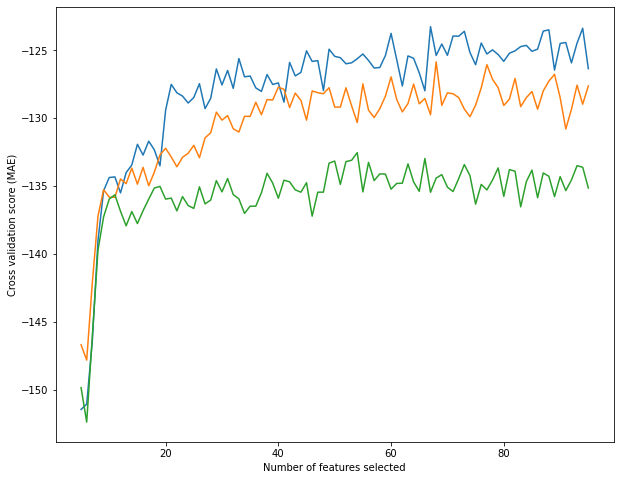

In [11]:
# Test du nombre de features
plt.rcParams["figure.figsize"] = (10,8)

kfold = KFold(n_splits=3, shuffle=True)

min_features_to_select = 5  # Minimum number of features to consider
rfecv = RFECV(
    estimator=RandomForestRegressor(),
    step=1,
    cv=kfold,
    scoring="neg_mean_absolute_error",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(data_train,y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (MAE)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [12]:
# Récupération des résultats
resultats_RFECV = pd.DataFrame(
    zip(data_train.columns, abs(rfecv.estimator_.feature_importances_ )),
    columns=["feature", "weight"]).sort_values("weight",ascending=False).reset_index(drop=True)

resultats_RFECV

,feature,weight
0,PropertyGFATotal,0.426713
1,Electricity_proportion,0.325465
2,NaturalGas_proportion,0.023033
3,Surface_par_etage,0.022113
4,harvesine_distance,0.021795
...,...,...
83,NumberofBuildings_cat_Entre 5 et 6 batiments,0.000125
84,PrimaryPropertyType_Hospital,0.000120
85,NumberofBuildings,0.000095
86,PrimaryPropertyType_Office,0.000052


In [13]:
# Conservation des 40 features les plus importantes, apparaission d'un palier ensuite
selected_features_emmi = resultats_RFECV['feature'].iloc[:42].values
data_train_filtred_emmi = data_train[selected_features_emmi]
data_test_filtred_emmi = data_test[selected_features_emmi]

In [14]:
# Modèle avec une Feature selection
from sklearn.pipeline import make_pipeline
model = RandomForestRegressor()

cv_results = cross_validate(model, data_train_filtred_emmi, target_emmi_train.values.ravel(), cv=5,scoring=(['r2','neg_mean_squared_error','neg_mean_absolute_error']),return_train_score=True,return_estimator=True)
cv_results=pd.DataFrame(cv_results)
cv_results.loc['Mean'] = cv_results.mean()
cv_results

/tmp/ipykernel_12203/817725735.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cv_results.loc['Mean'] = cv_results.mean()


,fit_time,score_time,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.520262,0.009567,"(DecisionTreeRegressor(max_features=1.0, rando...",0.545638,0.943649,-128529.528588,-18806.361758,-101.547863,-31.832219
1,0.513205,0.009411,"(DecisionTreeRegressor(max_features=1.0, rando...",0.663521,0.931796,-38184.167880,-25655.524008,-81.393140,-36.141783
2,0.519920,0.010579,"(DecisionTreeRegressor(max_features=1.0, rando...",0.762736,0.934482,-16388.361440,-25332.546065,-57.055249,-38.065433
3,0.507089,0.009394,"(DecisionTreeRegressor(max_features=1.0, rando...",0.355652,0.948303,-666860.517183,-7522.331112,-150.907834,-29.492897
4,0.520564,0.009329,"(DecisionTreeRegressor(max_features=1.0, rando...",-0.405488,0.945237,-160231.153093,-20585.095626,-110.510480,-35.261509
Mean,0.516208,0.009656,NaN,0.384412,0.940693,-202038.745637,-19580.371714,-100.282913,-34.158768


On ne constate pas de gain significatif avec une RFE préalable.

### Test des hyperparamètres

In [15]:
model = RandomForestRegressor()

param_rfr = {'max_depth': [3,5,10, 15,20, 25],
             'min_samples_split': [2,3,4, 5,6],
             'bootstrap' : [True,False],
             'min_samples_leaf': [2,3,4,5,6],
             'max_features' : ['sqrt','log2'],  
             'n_estimators' : [30,40,50,60,70,80,90,100]}

search = GridSearchCV(model,
                           param_grid=param_rfr,
                            cv=3,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1)

In [16]:
result = search.fit(data_train_filtred_emmi, target_emmi_train.values.ravel())
print('Best Hyperparameters: %s' % result.best_params_)

Best Hyperparameters: {'bootstrap': False, 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [17]:
# Entrainement du modèle
model_RF_select_emmi_tuned = RandomForestRegressor(max_depth=20,min_samples_split=2,bootstrap=False,max_features='sqrt',n_estimators=50,min_samples_leaf=4)
model_RF_select_emmi_tuned.fit(data_train_filtred_emmi, target_emmi_train.values.ravel())

# Metrics sur les données d'entrainement
predictions_emmi_feature_select_RF_train = model_RF_select_emmi_tuned.predict(data_train_filtred_emmi)

print('r2 :', r2_score(target_emmi_train,predictions_emmi_feature_select_RF_train))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_emmi_train, predictions_emmi_feature_select_RF_train)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_emmi_train, predictions_emmi_feature_select_RF_train)))

r2 : 0.7605191686248428
RMSE : 77504.72
MAE : 67.55


In [18]:
# Metrics sur les données d'entrainement
predictions_emmi_feature_select_RF_test = model_RF_select_emmi_tuned.predict(data_test_filtred_emmi)

print('r2 :', r2_score(target_emmi_test,predictions_emmi_feature_select_RF_test))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_emmi_test, predictions_emmi_feature_select_RF_test)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_emmi_test, predictions_emmi_feature_select_RF_test)))

r2 : 0.40402313820753777
RMSE : 189631.82
MAE : 114.54


In [19]:
# Ecriture des résultats
bilan_emmi.append(['RF - feature select' , 'Train','MAE', metrics.mean_absolute_error(target_emmi_train, predictions_emmi_feature_select_RF_train)])
bilan_emmi.append(['RF - feature select' , 'Train','RMSE', metrics.mean_squared_error(target_emmi_train, predictions_emmi_feature_select_RF_train)])
bilan_emmi.append(['RF - feature select' , 'Train', 'R2', r2_score(target_emmi_train,predictions_emmi_feature_select_RF_train)])

bilan_emmi.append(['RF - feature select' ,  'Test','MAE', format(metrics.mean_absolute_error(target_emmi_test, predictions_emmi_feature_select_RF_test))])
bilan_emmi.append(['RF - feature select' ,  'Test','RMSE', format(metrics.mean_squared_error(target_emmi_test, predictions_emmi_feature_select_RF_test))])
bilan_emmi.append(['RF - feature select' ,  'Test','R2', r2_score(target_emmi_test,predictions_emmi_feature_select_RF_test)])

### Regard sur les features importantes pour le modèle

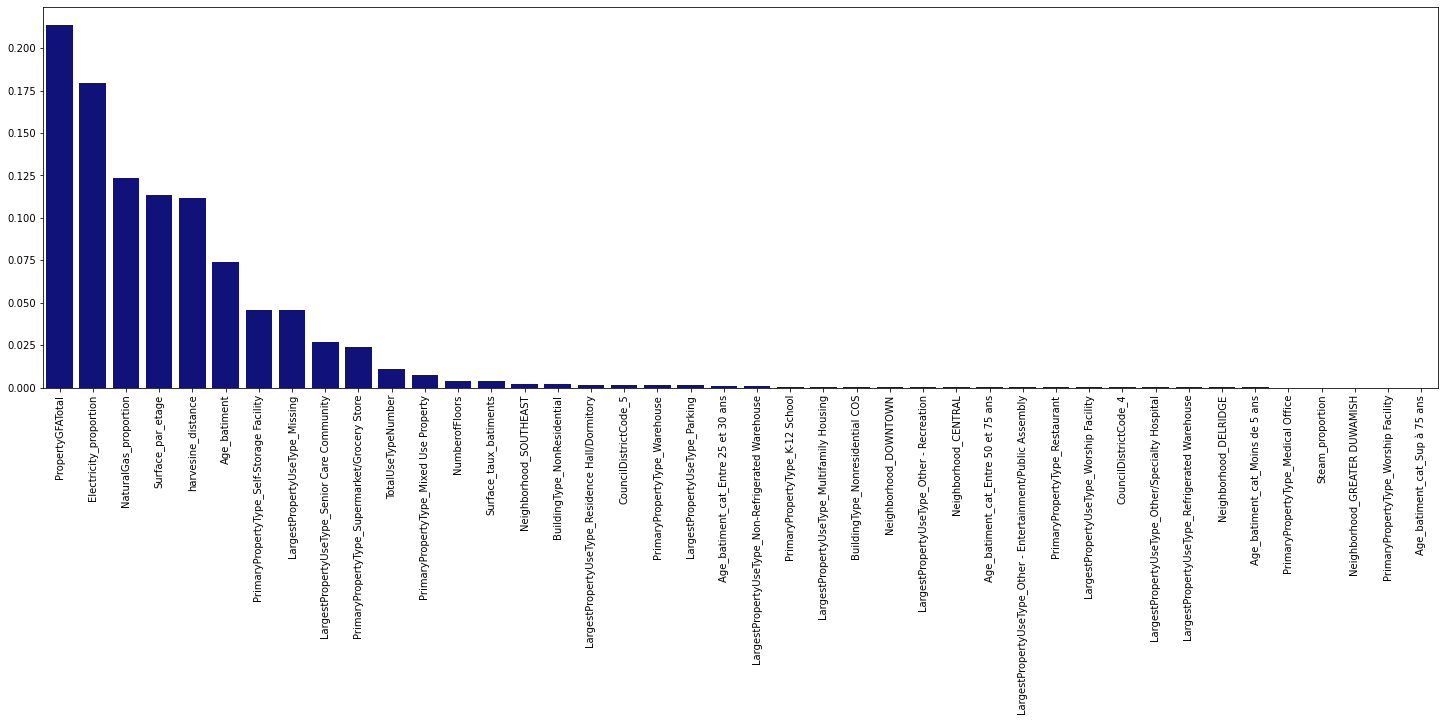

In [20]:
plt.rcParams["figure.figsize"] = (35,8)

importance_emmi = pd.Series(model_RF_select_emmi_tuned.feature_importances_,index=data_train_filtred_emmi.columns)
fig, ax = plt.subplots(figsize=(25,7))
sns.barplot(x=importance_emmi.index,y=importance_emmi.sort_values(ascending = False),color='darkblue')
_=plt.xticks(rotation=90)

### Cas de la consommation

In [21]:
model_RF_base_conso = RandomForestRegressor()

cv_results = cross_validate(model, data_train, target_conso_train.values.ravel(), cv=5,scoring=(['r2','neg_mean_squared_error','neg_mean_absolute_error']),return_train_score=True,return_estimator=True)
cv_results=pd.DataFrame(cv_results)
cv_results.loc['Mean'] = cv_results.mean()
cv_results

/tmp/ipykernel_12203/4151817810.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cv_results.loc['Mean'] = cv_results.mean()


,fit_time,score_time,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.809350,0.010426,"(DecisionTreeRegressor(max_features=1.0, rando...",0.404764,0.962354,-3.508477e+14,-1.181635e+13,-4.864697e+06,-1.185113e+06
1,0.827930,0.010549,"(DecisionTreeRegressor(max_features=1.0, rando...",0.813294,0.933695,-2.920401e+13,-2.801861e+13,-2.694859e+06,-1.502483e+06
2,0.812840,0.010366,"(DecisionTreeRegressor(max_features=1.0, rando...",0.341861,0.939573,-7.529025e+13,-2.613036e+13,-3.184142e+06,-1.474538e+06
3,0.793375,0.010305,"(DecisionTreeRegressor(max_features=1.0, rando...",0.431726,0.922697,-4.205097e+14,-2.140428e+13,-5.254873e+06,-1.416627e+06
4,0.821609,0.010366,"(DecisionTreeRegressor(max_features=1.0, rando...",0.745859,0.937699,-6.134535e+13,-2.500375e+13,-3.544787e+06,-1.479886e+06
Mean,0.813021,0.010402,NaN,0.547501,0.939204,-1.874394e+14,-2.247467e+13,-3.908672e+06,-1.411729e+06


In [22]:
#Entrainement du modèle
model_RF_base_conso.fit(data_train, target_conso_train.values.ravel())

# Metrics sur les données d'entrainement
predictions_conso_baseline_RF_train = model_RF_base_conso.predict(data_train)

print('r2 - test :', r2_score(target_conso_train,predictions_conso_baseline_RF_train))
print("RMSE - test : {:.2f}".format(metrics.mean_squared_error(target_conso_train, predictions_conso_baseline_RF_train)))
print("MAE - test : {:.2f}".format(metrics.mean_absolute_error(target_conso_train, predictions_conso_baseline_RF_train)))

r2 - test : 0.9444318861847097
RMSE - test : 20532118127065.39
MAE - test : 1361809.78


In [23]:
# Metrics sur les données de test
predictions_conso_baseline_RF_test = model_RF_base_conso.predict(data_test)

print('r2 - test :', r2_score(target_conso_test,predictions_conso_baseline_RF_test))
print("RMSE - test : {:.2f}".format(metrics.mean_squared_error(target_conso_test, predictions_conso_baseline_RF_test)))
print("MAE - test : {:.2f}".format(metrics.mean_absolute_error(target_conso_test, predictions_conso_baseline_RF_test)))

r2 - test : 0.6983555099380054
RMSE - test : 94457882874885.67
MAE - test : 3435578.68


In [24]:
# Ecriture des résultats
bilan_conso.append(['RF - baseline' , 'Train','MAE', metrics.mean_absolute_error(target_conso_train, predictions_conso_baseline_RF_train)])
bilan_conso.append(['RF - baseline' , 'Train','RMSE', metrics.mean_squared_error(target_conso_train, predictions_conso_baseline_RF_train)])
bilan_conso.append(['RF - baseline' , 'Train', 'R2', r2_score(target_conso_train,predictions_conso_baseline_RF_train)])

bilan_conso.append(['RF - baseline' ,  'Test','MAE', format(metrics.mean_absolute_error(target_conso_test, predictions_conso_baseline_RF_test))])
bilan_conso.append(['RF - baseline' ,  'Test','RMSE', format(metrics.mean_squared_error(target_conso_test, predictions_conso_baseline_RF_test))])
bilan_conso.append(['RF - baseline' ,  'Test','R2', r2_score(target_conso_test,predictions_conso_baseline_RF_test)])

## Recherche des features pertinentes via rfeCV

In [25]:
# Label encoder de la cible car RFECV ne fonctionne pas sur des données continues
label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(target_conso_train)

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features : 82


/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


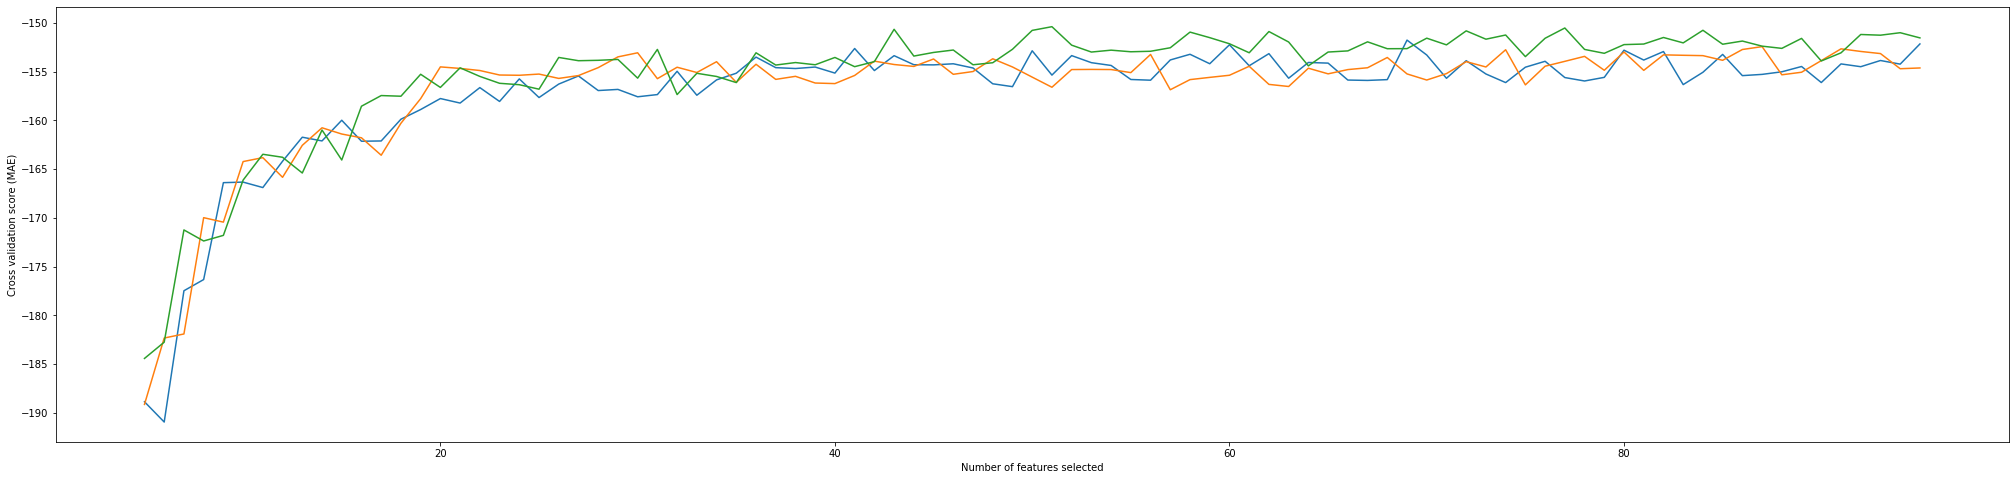

In [26]:
# Test du nombre de features
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3, shuffle=True)

min_features_to_select = 5  # Minimum number of features to consider
rfecv = RFECV(
    estimator=RandomForestRegressor(),
    step=1,
    cv=kfold,
    scoring="neg_mean_absolute_error",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(data_train,y1)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (MAE)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [27]:
# Récupération des résultats
resultats_RFECV = pd.DataFrame(
    zip(data_train.columns, abs(rfecv.estimator_.feature_importances_ )),
    columns=["feature", "weight"],
).sort_values("weight",ascending=False).reset_index(drop=True)
resultats_RFECV

,feature,weight
0,NumberofFloors,0.608774
1,Surface_taux_batiments,0.033802
2,harvesine_distance,0.031383
3,Age_batiment,0.028411
4,TotalUseTypeNumber,0.027849
...,...,...
77,PrimaryPropertyType_Hotel,0.000282
78,LargestPropertyUseType_Missing,0.000264
79,BuildingType_SPS-District K-12,0.000220
80,Neighborhood_NORTHEAST,0.000216


In [28]:
# Conservation des 38 features les plus importantes, apparition d'un palier ensuite
selected_features_conso = resultats_RFECV['feature'].iloc[:38].values
data_train_filtred_conso = data_train[selected_features_conso]
data_test_filtred_conso = data_test[selected_features_conso]

In [29]:
# Modèle avec une Feature selection
model_RF_select_conso = RandomForestRegressor()

cv_results = cross_validate(model_RF_select_conso, data_train_filtred_conso, target_conso_train.values.ravel(), cv=5,scoring=(['r2','neg_mean_squared_error','neg_mean_absolute_error']),return_train_score=True,return_estimator=True)
cv_results=pd.DataFrame(cv_results)
cv_results.loc['Mean'] = cv_results.mean()
cv_results

/tmp/ipykernel_12203/2111258966.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cv_results.loc['Mean'] = cv_results.mean()


,fit_time,score_time,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.487239,0.009489,"(DecisionTreeRegressor(max_features=1.0, rando...",0.406308,0.966883,-3.499375e+14,-1.039477e+13,-4.907752e+06,-1.264752e+06
1,0.461395,0.009430,"(DecisionTreeRegressor(max_features=1.0, rando...",0.749303,0.949584,-3.921335e+13,-2.130413e+13,-3.109763e+06,-1.443853e+06
2,0.484761,0.010640,"(DecisionTreeRegressor(max_features=1.0, rando...",0.718527,0.944724,-3.220018e+13,-2.390279e+13,-3.034495e+06,-1.508627e+06
3,0.471179,0.009328,"(DecisionTreeRegressor(max_features=1.0, rando...",0.488661,0.943123,-3.783797e+14,-1.574871e+13,-5.259601e+06,-1.415042e+06
4,0.470459,0.009362,"(DecisionTreeRegressor(max_features=1.0, rando...",0.710377,0.937427,-6.991009e+13,-2.511291e+13,-3.734556e+06,-1.513503e+06
Mean,0.475007,0.009650,NaN,0.614635,0.948348,-1.739282e+14,-1.929266e+13,-4.009233e+06,-1.429155e+06


On ne constate pas de gain particulier en terme de temps de calcul avec une RFE préalable.

### Test des hyperparamètres

In [30]:
model_RF_select_conso = RandomForestRegressor()

param_rfr = {'max_depth': [3,5,10, 15],
             'min_samples_split': [3,4, 5,6,7],
             'bootstrap' : [True,False],
             'min_samples_leaf': [3,4,5,6,7],
             'max_features' : ['sqrt','log2'],  
             'n_estimators' : [30,40,50,60,70,80,90,100]}

search = GridSearchCV(model_RF_select_conso,
                           param_grid=param_rfr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1)

In [31]:
result = search.fit(data_train_filtred_conso, target_conso_train.values.ravel())
print('Best Hyperparameters: %s' % result.best_params_)

Best Hyperparameters: {'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 90}


In [32]:
# Entrainement du modèle
model_RF_select_conso_tuned = RandomForestRegressor(bootstrap = False,max_depth=15,max_features='sqrt',n_estimators=80,min_samples_split=3,min_samples_leaf=3)
model_RF_select_conso_tuned.fit(data_train_filtred_conso, target_conso_train.values.ravel())

# Metrics sur les données d'entrainement
predictions_conso_select_RF_train = model_RF_select_conso_tuned.predict(data_train_filtred_conso)

print('r2 - test :', r2_score(target_conso_train,predictions_conso_select_RF_train))
print("RMSE - test : {:.2f}".format(metrics.mean_squared_error(target_conso_train, predictions_conso_select_RF_train)))
print("MAE - test : {:.2f}".format(metrics.mean_absolute_error(target_conso_train, predictions_conso_select_RF_train)))

r2 - test : 0.835118530554712
RMSE - test : 60922813015892.84
MAE - test : 2488602.30


In [33]:
# Metrics sur les données de test
predictions_conso_select_RF_test = model_RF_select_conso_tuned.predict(data_test_filtred_conso)

print('r2 :', r2_score(target_conso_test,predictions_conso_select_RF_test))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_conso_test, predictions_conso_select_RF_test)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_conso_test, predictions_conso_select_RF_test)))

r2 : 0.5780591762916597
RMSE : 132127846584514.06
MAE : 3659478.89


In [34]:
# Ecriture des résultats
bilan_conso.append(['RF - feature select' , 'Train','MAE', metrics.mean_absolute_error(target_conso_train, predictions_conso_select_RF_train)])
bilan_conso.append(['RF - feature select' , 'Train','RMSE', metrics.mean_squared_error(target_conso_train, predictions_conso_select_RF_train)])
bilan_conso.append(['RF - feature select' , 'Train', 'R2', r2_score(target_conso_train,predictions_conso_select_RF_train)])

bilan_conso.append(['RF - feature select' ,  'Test','MAE', format(metrics.mean_absolute_error(target_conso_test, predictions_conso_select_RF_test))])
bilan_conso.append(['RF - feature select' ,  'Test','RMSE', format(metrics.mean_squared_error(target_conso_test, predictions_conso_select_RF_test))])
bilan_conso.append(['RF - feature select' ,  'Test','R2', r2_score(target_conso_test,predictions_conso_select_RF_test)])

### Regard sur les features importantes pour le modèle

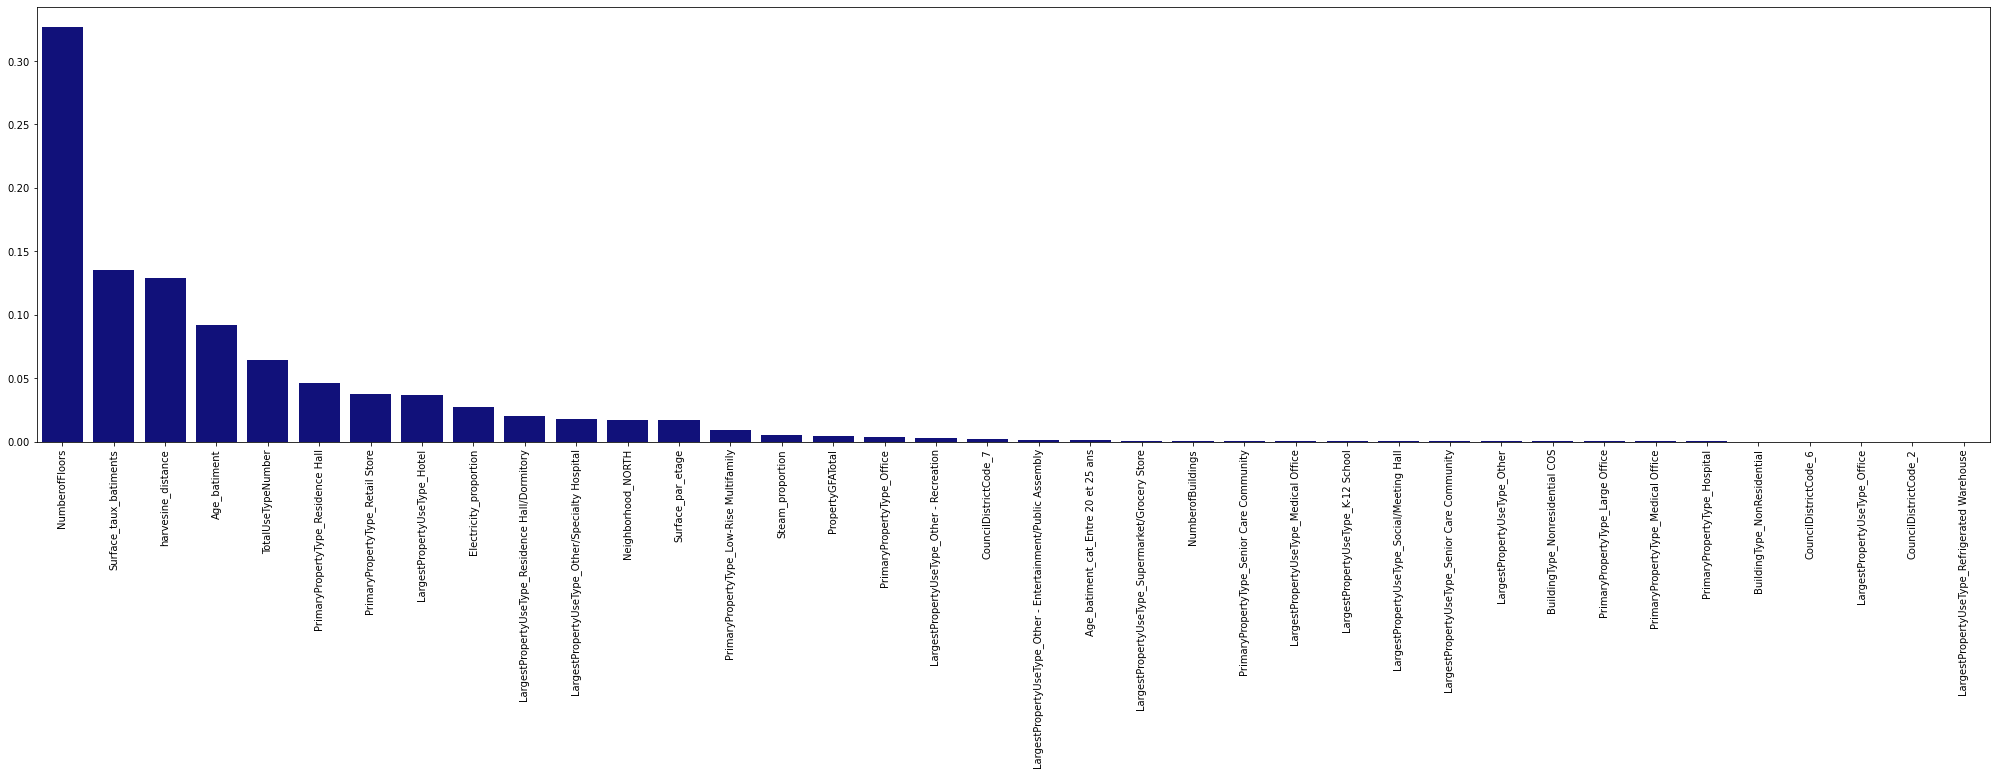

In [35]:
plt.rcParams["figure.figsize"] = (35,8)

importance_conso = pd.Series(model_RF_select_conso_tuned.feature_importances_,index=data_train_filtred_conso.columns)
sns.barplot(x=importance_conso.index,y=importance_conso.sort_values(ascending = False),color='darkblue')
_=plt.xticks(rotation=90)

### XGBoost

### Cas des émissions de CO2

In [36]:
import xgboost as xgb

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [37]:
# Déclaration du modèle
xgbr = xgb.XGBRegressor(verbosity=0) 

# Entrainement du modèle
xgbr.fit(data_train, target_emmi_train.values.ravel())

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [38]:
# Calcul des métrics sur les données d'entrainement
predictions_emmi_XGBoost_train = xgbr.predict(data_train)

print('r2 :', r2_score(target_emmi_train,predictions_emmi_XGBoost_train))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_emmi_train, predictions_emmi_XGBoost_train)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_emmi_train, predictions_emmi_XGBoost_train)))

bilan_emmi.append(['XGBoost' , 'Train','MAE', metrics.mean_absolute_error(target_emmi_train, predictions_emmi_XGBoost_train)])
bilan_emmi.append(['XGBoost' , 'Train','RMSE', metrics.mean_squared_error(target_emmi_train, predictions_emmi_XGBoost_train)])
bilan_emmi.append(['XGBoost' , 'Train', 'R2', r2_score(target_emmi_train,predictions_emmi_XGBoost_train)])

r2 : 0.9996238551893374
RMSE : 121.73
MAE : 7.54


In [39]:
# Calcul des metrics sur le jeu de test
predictions_emmi_XGBoost_test = xgbr.predict(data_test)

print('r2 :', r2_score(target_emmi_test,predictions_emmi_XGBoost_test))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_emmi_test, predictions_emmi_XGBoost_test)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_emmi_test, predictions_emmi_XGBoost_test)))

bilan_emmi.append(['XGBoost' , 'Test','MAE', metrics.mean_absolute_error(target_emmi_test, predictions_emmi_XGBoost_test)])
bilan_emmi.append(['XGBoost' , 'Test','RMSE', metrics.mean_squared_error(target_emmi_test, predictions_emmi_XGBoost_test)])
bilan_emmi.append(['XGBoost' , 'Test', 'R2', r2_score(target_emmi_test,predictions_emmi_XGBoost_test)])

r2 : 0.8409651973501839
RMSE : 50602.74
MAE : 83.41


/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


### Hyperparamétrisation

In [40]:
model_XGB_emmi_tuned = xgb.XGBRegressor(verbosity=0) 

param_xgb = {'m__learning_rate' : [0.1, 0.2, 0,3],
             'm__gamma': [0.25, 0.5, 1.0],
             'm__max_depth': [5,10,15,20],
             'm__min_child_weight' : [3.0,4,5],
             'm__n_estimators': [25, 50]}

search = GridSearchCV(model_XGB_emmi_tuned,
                           param_grid=param_xgb,
                            cv=3,
                            scoring=('neg_mean_absolute_error'),
                            return_train_score = True)

result = search.fit(data_train, target_emmi_train.values.ravel())
print('Best Hyperparameters: %s' % result.best_params_)

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.

Best Hyperparameters: {'m__gamma': 0.25, 'm__learning_rate': 0.1, 'm__max_depth': 5, 'm__min_child_weight': 3.0, 'm__n_estimators': 25}


In [41]:
# Metrics sur les données d'entrainement
model_XGB_emmi_tuned = xgb.XGBRegressor(verbosity=0,learning_rate=0.1,gamma=0.25,max_depth=5,min_child_weight=3,n_estimators=25)
model_XGB_emmi_tuned.fit(data_train, target_emmi_train.values.ravel())
                      
predictions_emmi_XGBoost_tuned_train = model_XGB_emmi_tuned.predict(data_train)

print('r2 :', r2_score(target_emmi_train,predictions_emmi_XGBoost_tuned_train))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_emmi_train, predictions_emmi_XGBoost_tuned_train)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_emmi_train, predictions_emmi_XGBoost_tuned_train)))

r2 : 0.9188012943761567
RMSE : 26278.86
MAE : 60.28


In [42]:
# Metrics sur les données de test                      
predictions_emmi_XGBoost_tuned_test = model_XGB_emmi_tuned.predict(data_test)

print('r2 :', r2_score(target_emmi_test,predictions_emmi_XGBoost_tuned_test))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_emmi_test, predictions_emmi_XGBoost_tuned_test)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_emmi_test, predictions_emmi_XGBoost_tuned_test)))

r2 : 0.7720616385124208
RMSE : 72526.92
MAE : 84.75


/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [43]:
# Ecriture des résultats
bilan_emmi.append(['XGBoost - tuned' , 'Train','MAE', metrics.mean_absolute_error(target_emmi_train, predictions_emmi_XGBoost_tuned_train)])
bilan_emmi.append(['XGBoost - tuned' , 'Train','RMSE', metrics.mean_squared_error(target_emmi_train, predictions_emmi_XGBoost_tuned_train)])
bilan_emmi.append(['XGBoost - tuned' , 'Train', 'R2', r2_score(target_emmi_train,predictions_emmi_XGBoost_tuned_train)])

bilan_emmi.append(['XGBoost - tuned' ,  'Test','MAE', format(metrics.mean_absolute_error(target_emmi_test, predictions_emmi_XGBoost_tuned_test))])
bilan_emmi.append(['XGBoost - tuned' ,  'Test','RMSE', format(metrics.mean_squared_error(target_emmi_test, predictions_emmi_XGBoost_tuned_test))])
bilan_emmi.append(['XGBoost - tuned' ,  'Test','R2', r2_score(target_emmi_test,predictions_emmi_XGBoost_tuned_test)])

### Influence du nombre d'estimateurs

In [44]:
MAE_train= []
MAE_test=[]

for estimat in range(10,300,10):
    model = xgb.XGBRegressor(verbosity=0,learning_rate=0.1,gamma=0.25,max_depth=5,min_child_weight=3,n_estimators=estimat)
    model.fit(data_train, target_emmi_train.values.ravel())
                      
    predictions_emmi_XGBoost_tuned_infl_train = model.predict(data_train)
    MAE_train.append([estimat,metrics.mean_absolute_error(target_emmi_train, predictions_emmi_XGBoost_tuned_infl_train)])
    predictions_emmi_XGBoost_tuned_infl_test = model.predict(data_test)
    MAE_test.append([estimat,metrics.mean_absolute_error(target_emmi_test, predictions_emmi_XGBoost_tuned_infl_test)])               

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.

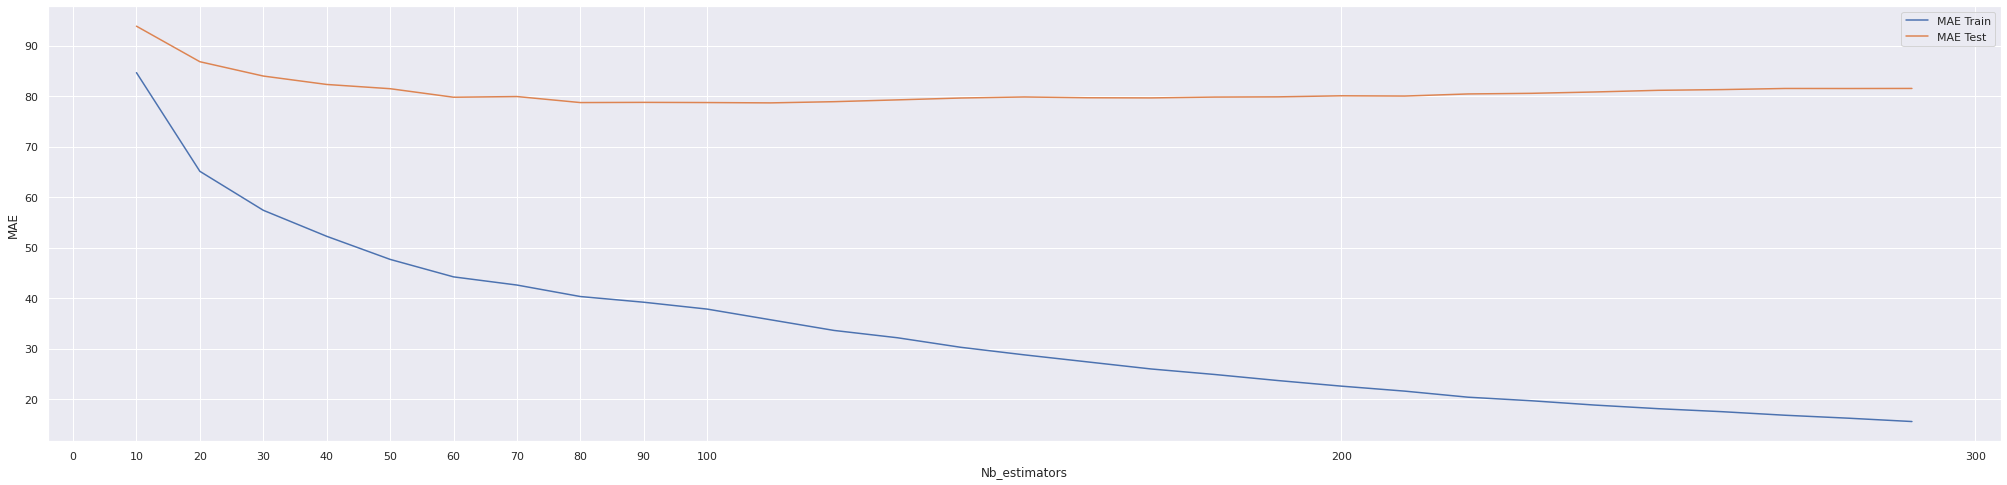

In [45]:
df1 = pd.DataFrame(MAE_train,columns=('Nb_estimators','MAE Train'))
df2 = pd.DataFrame(MAE_test,columns=('Nb_estimators','MAE Test'))       
    
sns.set()
sns.lineplot(x=df1['Nb_estimators'],y=df1['MAE Train'], linestyle="-") 
sns.lineplot(x=df2['Nb_estimators'],y=df2['MAE Test'], linestyle="-",)
_=plt.ylabel('MAE')
_=plt.legend(labels=["MAE Train","MAE Test"])
_=plt.xticks([0,10,20,30,40,50,60,70,80,90,100,200, 300])

## Cas des consommations

In [46]:
# Déclaration du modèle
xgbr_conso = xgb.XGBRegressor(verbosity=0) 

# Entrainement du modèle
xgbr_conso.fit(data_train, target_conso_train.values.ravel())

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [47]:
# Calcul des métrics sur les données d'entrainement
predictions_conso_XGBoost_train = xgbr_conso.predict(data_train)

print('r2 :', r2_score(target_conso_train,predictions_conso_XGBoost_train))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_conso_train, predictions_conso_XGBoost_train)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_conso_train, predictions_conso_XGBoost_train)))

r2 : 0.9993896734844236
RMSE : 225512353281.40
MAE : 330009.59


In [48]:
# Calcul des metrics sur le jeu de test
predictions_conso_XGBoost_test = xgbr_conso.predict(data_test)

print('r2 :', r2_score(target_conso_test,predictions_conso_XGBoost_test))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_conso_test, predictions_conso_XGBoost_test)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_conso_test, predictions_conso_XGBoost_test)))

r2 : 0.45563124846708636
RMSE : 170465304247645.22
MAE : 3671281.17


/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [49]:
# Ecriture des résultats
bilan_conso.append(['XGBoost' , 'Train','MAE', metrics.mean_absolute_error(target_conso_train, predictions_conso_XGBoost_train)])
bilan_conso.append(['XGBoost' , 'Train','RMSE', metrics.mean_squared_error(target_conso_train, predictions_conso_XGBoost_train)])
bilan_conso.append(['XGBoost' , 'Train', 'R2', r2_score(target_conso_train,predictions_conso_XGBoost_train)])

bilan_conso.append(['XGBoost' , 'Test','MAE', metrics.mean_absolute_error(target_conso_test, predictions_conso_XGBoost_test)])
bilan_conso.append(['XGBoost' , 'Test','RMSE', metrics.mean_squared_error(target_conso_test, predictions_conso_XGBoost_test)])
bilan_conso.append(['XGBoost' , 'Test', 'R2', r2_score(target_conso_test,predictions_conso_XGBoost_test)])

### Hyperpamétrisation

In [50]:
model_XGB_conso_tuned = xgb.XGBRegressor(verbosity=0)

param_xgb = {'m__learning_rate' : [0.01,0.1, 0.2, 0,3],
             'm__gamma': [0.25, 0.5, 1.0],
             'm__max_depth': [5,10,15,20],
             'm__min_child_weight' : [3.0,4,5],
             'm__n_estimators': [25, 50,100]}

search = GridSearchCV(model_XGB_conso_tuned,
                           param_grid=param_xgb,
                            cv=3,
                            scoring=('neg_mean_absolute_error'),
                            return_train_score = True)              #n_job=-1 supp

result = search.fit(data_train, target_conso_train.values.ravel())
print('Best Hyperparameters: %s' % result.best_params_)

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.

Best Hyperparameters: {'m__gamma': 0.25, 'm__learning_rate': 0.01, 'm__max_depth': 5, 'm__min_child_weight': 3.0, 'm__n_estimators': 25}


In [51]:
# Entrainement du modèle optimisé
model_XGB_conso_tuned = xgb.XGBRegressor(verbosity=0,learning_rate=0.05,gamma=0.25,max_depth=6,min_child_weight=2,n_estimators=200)
model_XGB_conso_tuned.fit(data_train, target_conso_train.values.ravel())
                      
# Metrics sur les données d'entrainement
predictions_conso_XGBoost_tuned_train = model_XGB_conso_tuned.predict(data_train)

print('r2 :', r2_score(target_conso_train,predictions_conso_XGBoost_tuned_train))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_conso_train, predictions_conso_XGBoost_tuned_train)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_conso_train, predictions_conso_XGBoost_tuned_train)))

r2 : 0.9880428519892003
RMSE : 4418101651544.48
MAE : 1256745.91


In [52]:
# Metrics sur les données de test                      
predictions_conso_XGBoost_tuned_test = model_XGB_conso_tuned.predict(data_test)

print('r2 :', r2_score(target_conso_test,predictions_conso_XGBoost_tuned_test))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_conso_test, predictions_conso_XGBoost_tuned_test)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_conso_test, predictions_conso_XGBoost_tuned_test)))

r2 : 0.45065673906316506
RMSE : 172023037414059.22
MAE : 3727901.32


/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [53]:
# Ecriture des résultats
bilan_conso.append(['XGBoost - tuned' , 'Train','MAE', metrics.mean_absolute_error(target_conso_train, predictions_conso_XGBoost_tuned_train)])
bilan_conso.append(['XGBoost - tuned' , 'Train','RMSE', metrics.mean_squared_error(target_conso_train, predictions_conso_XGBoost_tuned_train)])
bilan_conso.append(['XGBoost - tuned' , 'Train', 'R2', r2_score(target_conso_train,predictions_conso_XGBoost_tuned_train)])

bilan_conso.append(['XGBoost - tuned' ,  'Test','MAE', format(metrics.mean_absolute_error(target_conso_test, predictions_conso_XGBoost_tuned_test))])
bilan_conso.append(['XGBoost - tuned' ,  'Test','RMSE', format(metrics.mean_squared_error(target_conso_test, predictions_conso_XGBoost_tuned_test))])
bilan_conso.append(['XGBoost - tuned' ,  'Test','R2', r2_score(target_conso_test,predictions_conso_XGBoost_tuned_test)])

## Bilan modèles non linéaires

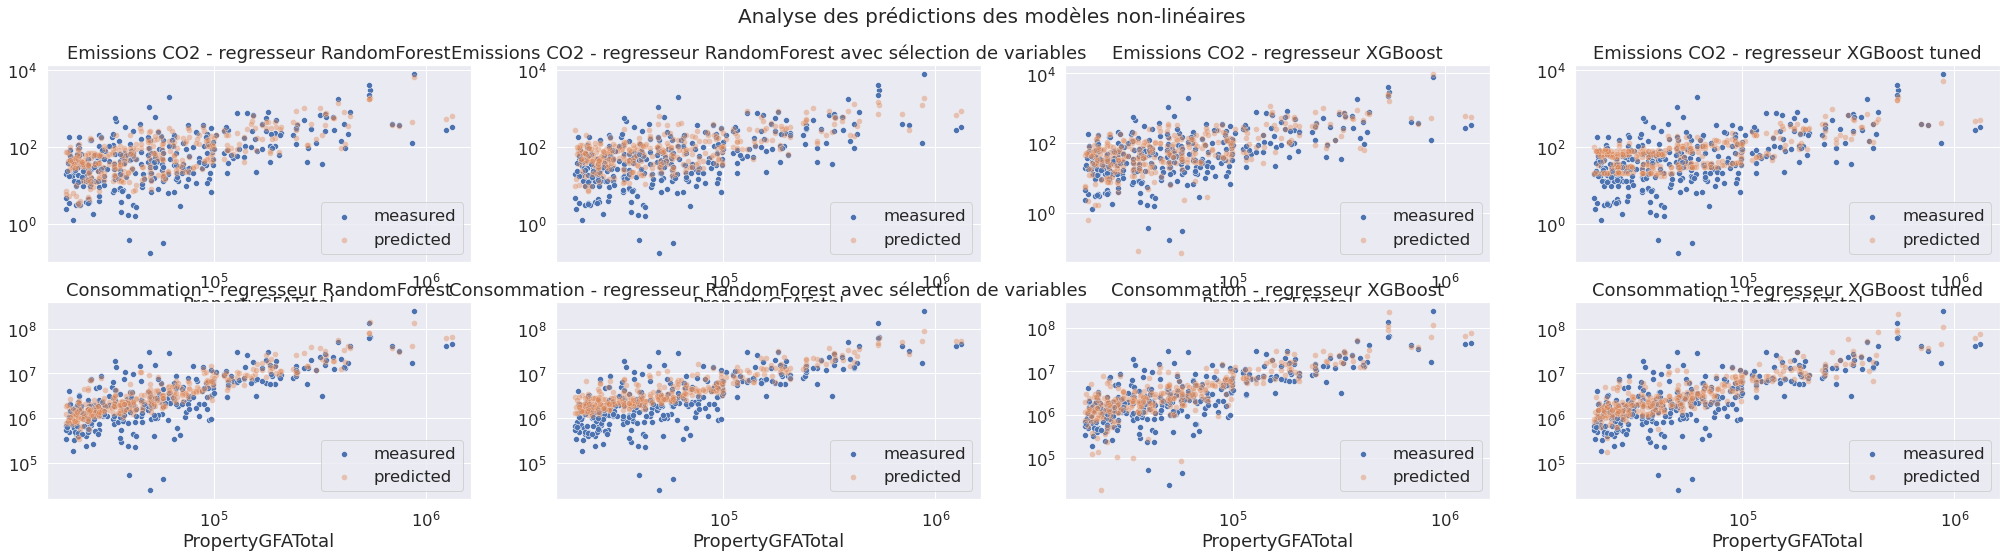

In [54]:
sns.set(font_scale = 1.5)
fig, axes = plt.subplots(2,4)
plt.rcParams["figure.figsize"] = (40,20)


# Plot RF baseline
sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_emmi_test.values.ravel(), label='measured' ,ax = axes[0,0])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=predictions_emmi_baseline_RF_test.ravel(), label='predicted', alpha=0.4,ax = axes[0,0])

sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_conso_test.values.ravel(), label='measured' ,ax = axes[1,0])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=predictions_conso_baseline_RF_test.ravel(), label='predicted', alpha=0.4,ax = axes[1,0])

# Plot RF - feature select
sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_emmi_test.values.ravel(), label='measured' ,ax = axes[0,1])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=predictions_emmi_feature_select_RF_test.ravel(), label='predicted', alpha=0.4,ax = axes[0,1])

sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_conso_test.values.ravel(), label='measured' ,ax = axes[1,1])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=predictions_conso_select_RF_test.ravel(), label='predicted', alpha=0.4,ax = axes[1,1])

# Plot XGBoost baseline
sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_emmi_test.values.ravel(), label='measured' ,ax = axes[0,2])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=predictions_emmi_XGBoost_test.ravel(), label='predicted', alpha=0.4,ax = axes[0,2])

sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_conso_test.values.ravel(), label='measured' ,ax = axes[1,2])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=predictions_conso_XGBoost_test.ravel(), label='predicted', alpha=0.4,ax = axes[1,2])

# Plot XGBoost - tuned
sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_emmi_test.values.ravel(), label='measured' ,ax = axes[0,3])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=predictions_emmi_XGBoost_tuned_test.ravel(), label='predicted', alpha=0.4,ax = axes[0,3])

sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_conso_test.values.ravel(), label='measured' ,ax = axes[1,3])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=predictions_conso_XGBoost_tuned_test.ravel(), label='predicted', alpha=0.4,ax = axes[1,3])



# Mise en place des titres et de l'échelle des axes
axes[0,0].set_title('Emissions CO2 - regresseur RandomForest')
axes[1,0].set_title('Consommation - regresseur RandomForest')
axes[0,1].set_title('Emissions CO2 - regresseur RandomForest avec sélection de variables')
axes[1,1].set_title('Consommation - regresseur RandomForest avec sélection de variables')
axes[0,2].set_title('Emissions CO2 - regresseur XGBoost')
axes[1,2].set_title('Consommation - regresseur XGBoost')
axes[0,3].set_title('Emissions CO2 - regresseur XGBoost tuned')
axes[1,3].set_title('Consommation - regresseur XGBoost tuned')


plt.suptitle('Analyse des prédictions des modèles non-linéaires',fontsize=20)

for i in range(2):
    for j in range(4):
        axes[i,j].set_yscale('log')
        axes[i,j].set_xscale('log')

In [55]:
# Affichage des scores - Consommation
bilan_conso =pd.DataFrame(bilan_conso)
bilan_conso[3]=pd.to_numeric(bilan_conso[3])
# bilan_conso[3] = bilan_conso[3].apply('{0:.2f}'.format)
bilan_conso.pivot(index=[1,2],columns=[0]).sort_values([1],ascending=False)

3                                                  
0          RF - baseline RF - feature select       XGBoost XGBoost - tuned
1     2                                                                   
Train MAE   1.361810e+06        2.488602e+06  3.300096e+05    1.256746e+06
      R2    9.444319e-01        8.351185e-01  9.993897e-01    9.880429e-01
      RMSE  2.053212e+13        6.092281e+13  2.255124e+11    4.418102e+12
Test  MAE   3.435579e+06        3.659479e+06  3.671281e+06    3.727901e+06
      R2    6.983555e-01        5.780592e-01  4.556312e-01    4.506567e-01
      RMSE  9.445788e+13        1.321278e+14  1.704653e+14    1.720230e+14

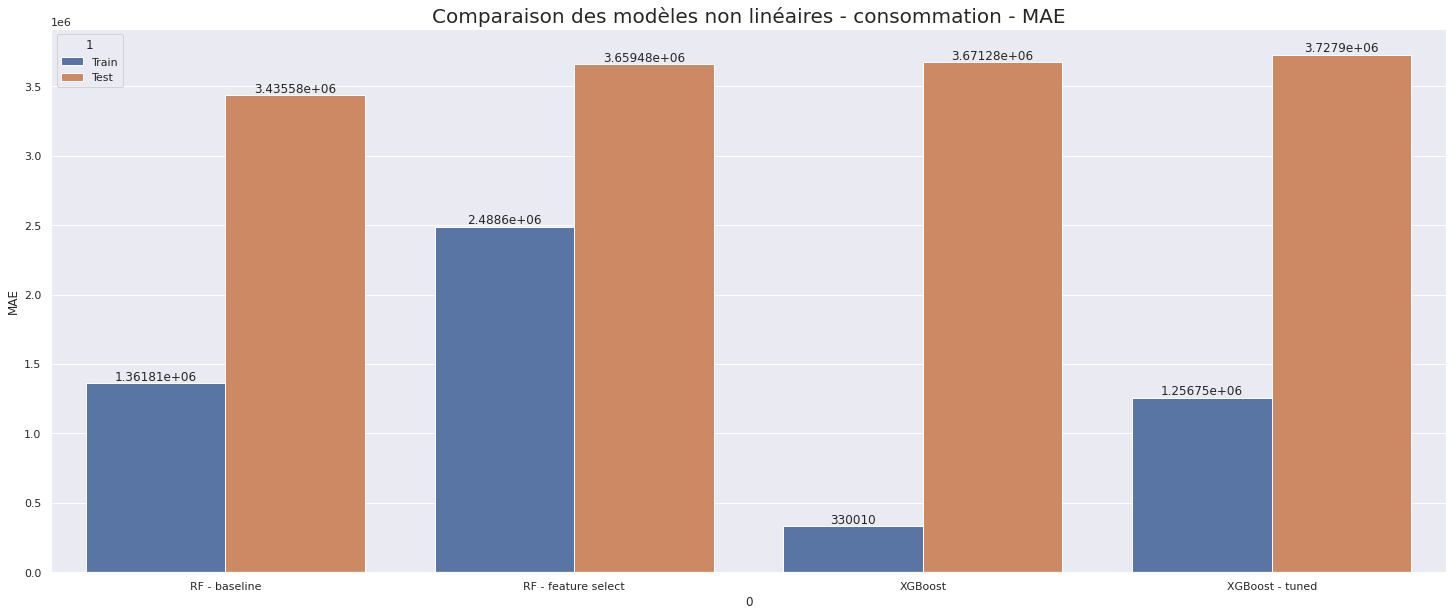

In [56]:
bilan_conso_MAE = bilan_conso[bilan_conso[2]=='MAE']

sns.set()
plt.rcParams["figure.figsize"] = (25,10)
ax = sns.barplot(x=bilan_conso_MAE[0],y=abs(bilan_conso_MAE[3]),hue=bilan_conso_MAE[1],data=bilan_conso_MAE)
_=ax.set_ylabel('MAE')
for container in ax.containers:
    ax.bar_label(container)
_ = ax.set_title('Comparaison des modèles non linéaires - consommation - MAE', fontsize=20)

In [57]:
# Affichage des scores - Emmissions
bilan_emmi =pd.DataFrame(bilan_emmi)
bilan_emmi[3]=pd.to_numeric(bilan_emmi[3])
bilan_emmi.pivot(index=0,columns=[2,1]).sort_values([(3,  'MAE',  'Test')],ascending=True)

3                                      \
2                          MAE          RMSE        R2         MAE   
1                        Train         Train     Train        Test   
0                                                                    
RF - baseline        31.498369  12588.792752  0.961102   78.113054   
XGBoost               7.541069    121.734165  0.999624   83.410004   
XGBoost - tuned      60.281933  26278.859434  0.918801   84.746054   
RF - feature select  67.553056  77504.721984  0.760519  114.543213   

                                              
2                             RMSE        R2  
1                             Test      Test  
0                                             
RF - baseline         50081.637183  0.842603  
XGBoost               50602.735070  0.840965  
XGBoost - tuned       72526.920690  0.772062  
RF - feature select  189631.821103  0.404023

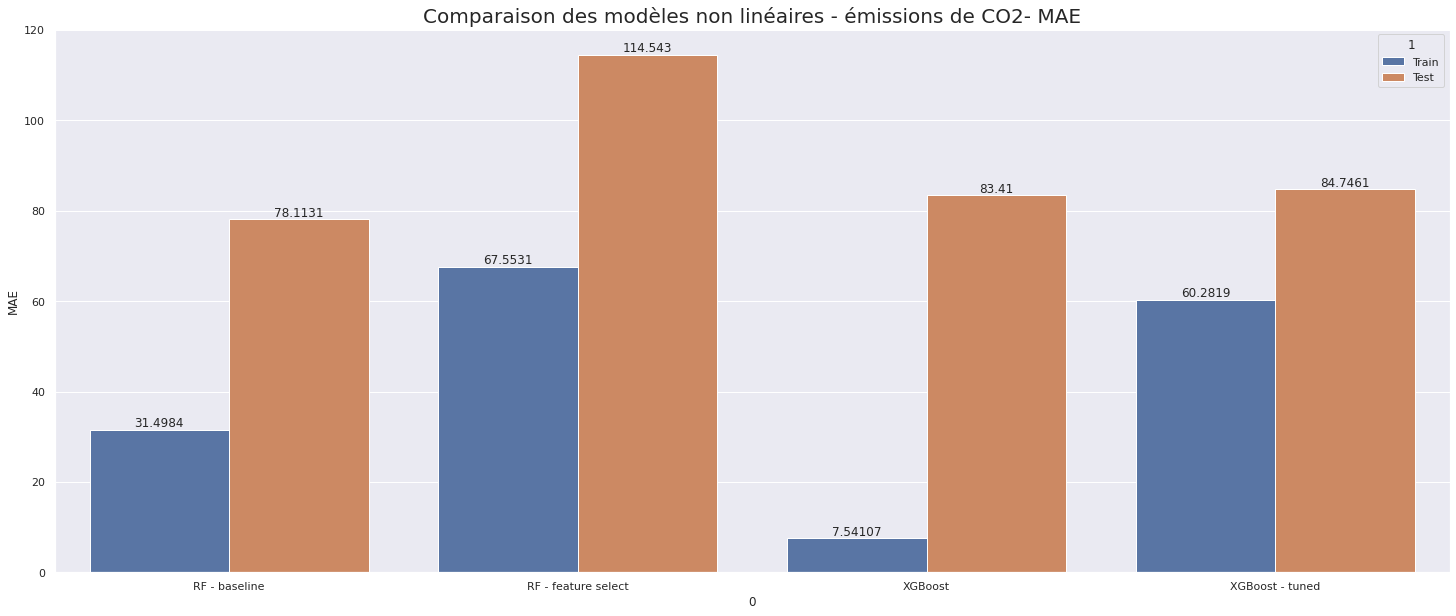

In [58]:
bilan_emmi_MAE = bilan_emmi[bilan_emmi[2]=='MAE']

sns.set()
plt.rcParams["figure.figsize"] = (25,10)
ax = sns.barplot(x=bilan_emmi_MAE[0],y=abs(bilan_emmi_MAE[3]),hue=bilan_emmi_MAE[1],data=bilan_emmi_MAE)
_=ax.set_ylabel('MAE')

for container in ax.containers:
    ax.bar_label(container)
    
_ = ax.set_title('Comparaison des modèles non linéaires - émissions de CO2- MAE', fontsize=20)

# Conclusion  
Sur notre meilleur modèle, nous allons regarder l'influence de l'EnergyStarScore sur les résultats.  
Nous regarderons également le comportement du modèle sur les années futures : 2017-2019 et 2020 en ne conservant que les nouveaux bâtiments.  

## Influence de l'EnergyStarScore

In [59]:
energystar_score_2015_train = pd.read_csv("energystar_score_2015_train.csv")
energystar_score_2015_test = pd.read_csv("energystar_score_2015_test.csv")

data_train_NRJ = pd.concat([energystar_score_2015_train,data_train],axis=1)
data_test_NRJ = pd.concat([energystar_score_2015_test,data_test],axis=1)

### Cas des émissions de CO2

In [60]:
# Metrics sur les émissions de CO2
model = xgb.XGBRegressor(verbosity=0,learning_rate=0.01,gamma=0.25,max_depth=10,min_child_weight=3,n_estimators=500)
model.fit(data_train_NRJ, target_emmi_train.values.ravel())
                      
predictions_emmi_XGBoost_NRJ_train = model.predict(data_train_NRJ)

print('r2 - train :', r2_score(target_emmi_train,predictions_emmi_XGBoost_NRJ_train))
print("RMSE - train : {:.2f}".format(metrics.mean_squared_error(target_emmi_train, predictions_emmi_XGBoost_NRJ_train)))
print("MAE - train : {:.2f}".format(metrics.mean_absolute_error(target_emmi_train, predictions_emmi_XGBoost_NRJ_train)))                      

predictions_emmi_XGBoost_NRJ_test = model.predict(data_test_NRJ)

print('r2 - test :', r2_score(target_emmi_test,predictions_emmi_XGBoost_NRJ_test))
print("RMSE - test : {:.2f}".format(metrics.mean_squared_error(target_emmi_test, predictions_emmi_XGBoost_NRJ_test)))
print("MAE - test : {:.2f}".format(metrics.mean_absolute_error(target_emmi_test, predictions_emmi_XGBoost_NRJ_test)))

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


r2 - train : 0.9862314714494437
RMSE - train : 4456.00
MAE - train : 21.11
r2 - test : 0.8381150938746215
RMSE - test : 51509.60
MAE - test : 75.43


/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [61]:
compare_NRJ_emmi = bilan_emmi_MAE[bilan_emmi_MAE[0]=='XGBoost']
compare_NRJ_emmi = compare_NRJ_emmi.append([['XGBoost_av_EnergyStarScore','Train','MAE',metrics.mean_absolute_error(target_emmi_train, predictions_emmi_XGBoost_NRJ_train)]])
compare_NRJ_emmi = compare_NRJ_emmi.append([['XGBoost_av_EnergyStarScore','Test','MAE',metrics.mean_absolute_error(target_emmi_test, predictions_emmi_XGBoost_NRJ_test)]])

/tmp/ipykernel_12203/1450532975.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_NRJ_emmi = compare_NRJ_emmi.append([['XGBoost_av_EnergyStarScore','Train','MAE',metrics.mean_absolute_error(target_emmi_train, predictions_emmi_XGBoost_NRJ_train)]])
/tmp/ipykernel_12203/1450532975.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_NRJ_emmi = compare_NRJ_emmi.append([['XGBoost_av_EnergyStarScore','Test','MAE',metrics.mean_absolute_error(target_emmi_test, predictions_emmi_XGBoost_NRJ_test)]])


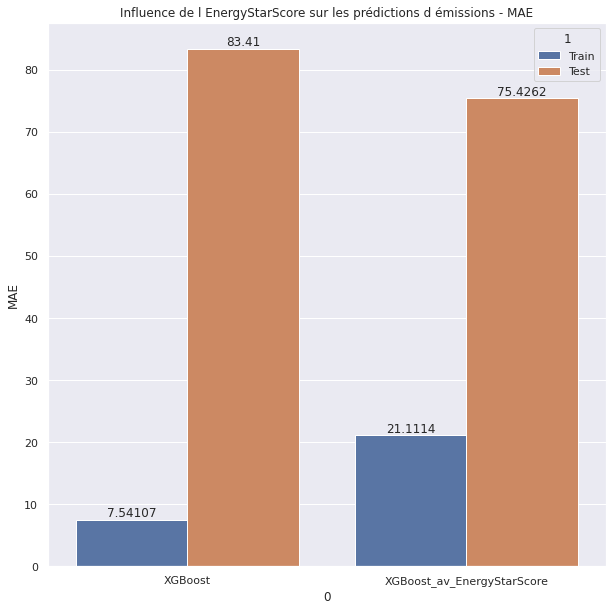

In [62]:
plt.rcParams["figure.figsize"] = (10,10)
sns.set()

ax = sns.barplot(x=compare_NRJ_emmi[0],y=abs(compare_NRJ_emmi[3]),hue=compare_NRJ_emmi[1],data=compare_NRJ_emmi)
_=ax.set_ylabel('MAE')
for container in ax.containers:
    ax.bar_label(container)
_ = ax.set_title('Influence de l EnergyStarScore sur les prédictions d émissions - MAE')

### Cas de la consommation

In [63]:
# Metrics sur la consommation
model = xgb.XGBRegressor(verbosity=0,learning_rate=0.01,gamma=0.25,max_depth=10,min_child_weight=3,n_estimators=500)
model.fit(data_train_NRJ, target_conso_train.values.ravel())
                      
predictions_conso_XGBoost_NRJ_train = model.predict(data_train_NRJ)

print('r2 - train :', r2_score(target_conso_train,predictions_conso_XGBoost_NRJ_train))
print("RMSE - train : {:.2f}".format(metrics.mean_squared_error(target_conso_train, predictions_conso_XGBoost_NRJ_train)))
print("MAE - train : {:.2f}".format(metrics.mean_absolute_error(target_conso_train, predictions_conso_XGBoost_NRJ_train)))
                      

predictions_conso_XGBoost_NRJ_test = model.predict(data_test_NRJ)

print('r2 - test :', r2_score(target_conso_test,predictions_conso_XGBoost_NRJ_test))
print("RMSE - test : {:.2f}".format(metrics.mean_squared_error(target_conso_test, predictions_conso_XGBoost_NRJ_test)))
print("MAE - test : {:.2f}".format(metrics.mean_absolute_error(target_conso_test, predictions_conso_XGBoost_NRJ_test)))

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


r2 - train : 0.973412095843283
RMSE - train : 9824087078273.16
MAE - train : 1000819.31
r2 - test : 0.7726717619312307
RMSE - test : 71186263277147.16
MAE - test : 3146230.41


/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [64]:
compare_NRJ_conso = bilan_conso_MAE[bilan_conso_MAE[0]=='XGBoost']
compare_NRJ_conso = compare_NRJ_conso.append([['XGBoost_av_EnergyStarScore','Train','MAE',metrics.mean_absolute_error(target_conso_train, predictions_conso_XGBoost_NRJ_train)]])
compare_NRJ_conso = compare_NRJ_conso.append([['XGBoost_av_EnergyStarScore','Test','MAE',metrics.mean_absolute_error(target_conso_test, predictions_conso_XGBoost_NRJ_test)]])

/tmp/ipykernel_12203/3890852113.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_NRJ_conso = compare_NRJ_conso.append([['XGBoost_av_EnergyStarScore','Train','MAE',metrics.mean_absolute_error(target_conso_train, predictions_conso_XGBoost_NRJ_train)]])
/tmp/ipykernel_12203/3890852113.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_NRJ_conso = compare_NRJ_conso.append([['XGBoost_av_EnergyStarScore','Test','MAE',metrics.mean_absolute_error(target_conso_test, predictions_conso_XGBoost_NRJ_test)]])


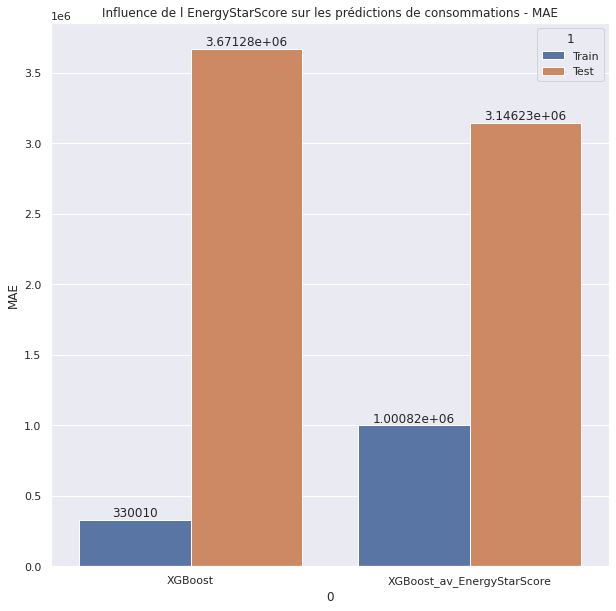

In [65]:
sns.set()
plt.rcParams["figure.figsize"] = (10,10)

ax = sns.barplot(x=compare_NRJ_conso[0],y=abs(compare_NRJ_conso[3]),hue=compare_NRJ_conso[1],data=compare_NRJ_conso)
for container in ax.containers:
    ax.bar_label(container)
_ = ax.set_title('Influence de l EnergyStarScore sur les prédictions de consommations - MAE')
_=ax.set_ylabel('MAE')

On observe qu'aussi bien sur les consommations que sur les émissions, la prise en compte de l'EnergyStarScore améliore légèrement les performances.  
Néanmoins, cette variable est encore peu renseignée, il est donc difficile de savoir si ca prise en compte est réellement significative.  

## Test du meilleur modèle sur des batiments jamais rencontrés

In [66]:
# Importation des années futures
data_encoded_2016_temp = data_encoded_2016.drop(['ENERGYSTARScore','TotalGHGEmissions','SiteEnergyUse'],axis=1)
data_encoded_futur_temp = data_encoded_futur.drop(['ENERGYSTARScore','TotalGHGEmissions','SiteEnergyUse'],axis=1)
target_conso_futur_test = data_encoded_futur[['SiteEnergyUse']]
target_emmi_futur_test = data_encoded_futur[['TotalGHGEmissions']]

In [67]:
# Ajout des colonnes manquantes dans le df_futur - En effet, vu que toutes les modalités oneHotEncodées ne sont pas présentes dans les années futures, nécessicité de créer ces colonnes
new_features = data_train.columns.difference(data_encoded_futur_temp.columns)
for n in new_features:
    data_test_futur[n] = 0

### Cas des émissions de CO2

In [68]:
# Metrics sur 2016
predictions_emmi_XGBoost_2016_test = model_XGB_emmi_tuned.predict(data_encoded_2016_temp)

print("RMSE : {:.2f}".format(metrics.mean_squared_error(data_encoded_2016['TotalGHGEmissions'], predictions_emmi_XGBoost_2016_test)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(data_encoded_2016['TotalGHGEmissions'], predictions_emmi_XGBoost_2016_test)))
print("R2 : {:.2f}".format(r2_score(data_encoded_2016['TotalGHGEmissions'],predictions_emmi_XGBoost_2016_test)))

RMSE : 181504.08
MAE : 79.25
R2 : 0.64


/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [69]:
# Metrics sur les batiments jamais rencontrés
predictions_emmi_XGBoost_futur_test = model_XGB_emmi_tuned.predict(data_encoded_futur_temp.drop(['Surface_par_batiment'],axis=1))

print('r2 - test :', r2_score(target_emmi_futur_test,predictions_emmi_XGBoost_futur_test))
print("RMSE - test : {:.2f}".format(metrics.mean_squared_error(target_emmi_futur_test, predictions_emmi_XGBoost_futur_test)))
print("MAE - test : {:.2f}".format(metrics.mean_absolute_error(target_emmi_futur_test, predictions_emmi_XGBoost_futur_test)))

r2 - test : 0.3866848680694701
RMSE - test : 902216.44
MAE - test : 278.87


/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


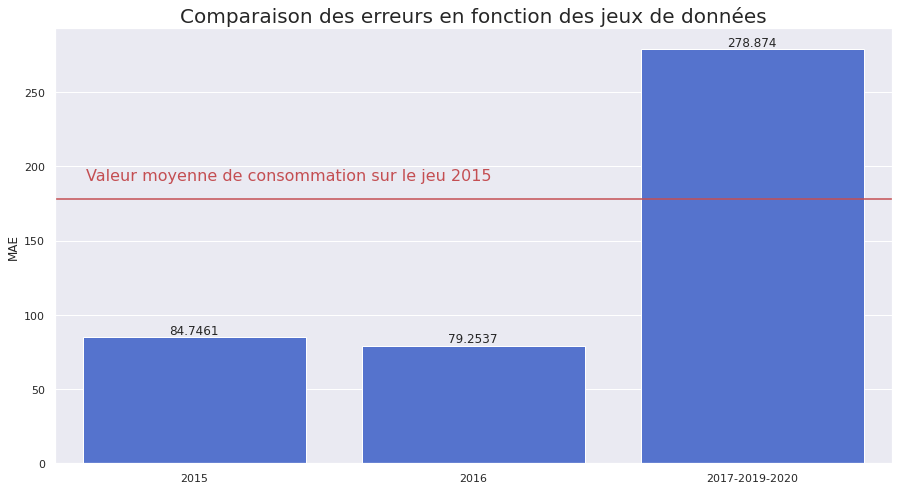

In [70]:
# Comparaison des erreurs de prédictions sur les jeux de données
sns.set()
plt.rcParams["figure.figsize"] = (15,8)
Jeux_de_données = ['2015','2016','2017-2019-2020']
Valeurs = [metrics.mean_absolute_error(target_emmi_test, predictions_emmi_XGBoost_tuned_test),metrics.mean_absolute_error(data_encoded_2016['TotalGHGEmissions'], predictions_emmi_XGBoost_2016_test),metrics.mean_absolute_error(target_emmi_futur_test, predictions_emmi_XGBoost_futur_test)]

ax = sns.barplot(x=Jeux_de_données,y=Valeurs,color='royalblue')
plt.axhline(y=178,color='r')
_=ax.set_ylabel('MAE')

ax.annotate('Valeur moyenne de consommation sur le jeu 2015', xy=(1, 0), xycoords='axes fraction', fontsize=16,
                xytext=(-400, 280), textcoords='offset points',color='r',
                ha='right', va='bottom')

for container in ax.containers:
    ax.bar_label(container)

_ = ax.set_title('Comparaison des erreurs en fonction des jeux de données', fontsize=20)

Text(0.5, 1.0, 'Prédictions années futures')

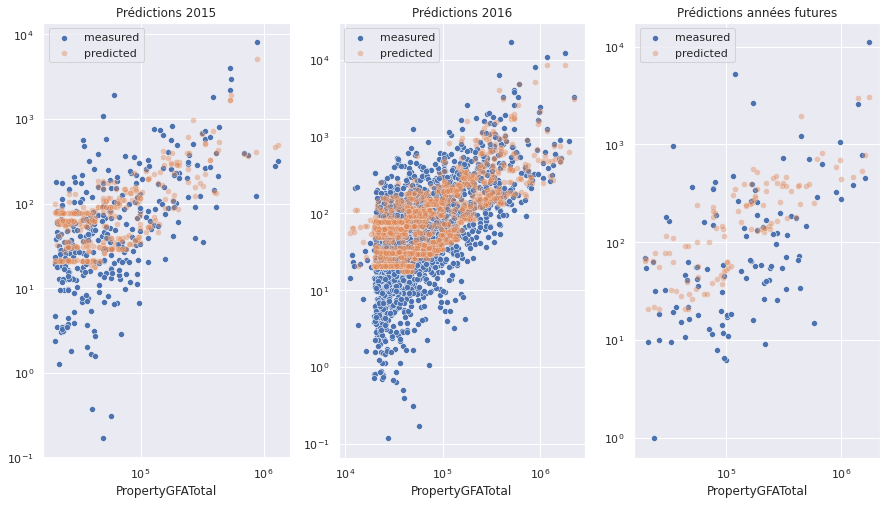

In [71]:
sns.set(font_scale = 1)
fig, axes = plt.subplots(1,3)
plt.rcParams["figure.figsize"] = (25,7)

# Sur le jeu de 2015
sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_emmi_test.values.ravel(), label='measured' ,ax = axes[0])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=predictions_emmi_XGBoost_tuned_test.ravel(), label='predicted', alpha=0.4,ax = axes[0])

# Sur le jeu de 2016
sns.scatterplot(x=data_encoded_2016['PropertyGFATotal'], y=data_encoded_2016['TotalGHGEmissions'].values.ravel(), label='measured' ,ax = axes[1])
sns.scatterplot(x=data_encoded_2016['PropertyGFATotal'], y=predictions_emmi_XGBoost_2016_test.ravel(), label='predicted', alpha=0.4,ax = axes[1])

# Sur les années futures
sns.scatterplot(x=data_encoded_futur['PropertyGFATotal'], y=data_encoded_futur['TotalGHGEmissions'].values.ravel(), label='measured' ,ax = axes[2])
sns.scatterplot(x=data_encoded_futur['PropertyGFATotal'], y=predictions_emmi_XGBoost_futur_test.ravel(), label='predicted', alpha=0.4,ax = axes[2])

for i in range(3):
    axes[i].set_yscale('log')
    axes[i].set_xscale('log')
    
axes[0].set_title('Prédictions 2015')
axes[1].set_title('Prédictions 2016')
axes[2].set_title('Prédictions années futures')

### Cas de la consommation

In [72]:
# Cas de la consommation
predictions_conso_RF_select_2016_test = model_RF_select_conso_tuned.predict(data_encoded_2016_temp[selected_features_conso])

print("RMSE : {:.2f}".format(metrics.mean_squared_error(data_encoded_2016['SiteEnergyUse'], predictions_conso_RF_select_2016_test)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(data_encoded_2016['SiteEnergyUse'], predictions_conso_RF_select_2016_test)))
print("R2 : {:.2f}".format(r2_score(data_encoded_2016['SiteEnergyUse'],predictions_conso_RF_select_2016_test)))

RMSE : 181785534076325.94
MAE : 3237634.17
R2 : 0.61


In [73]:
# Cas de la consommation
predictions_conso_RF_select_futur_test = model_RF_select_conso_tuned.predict(data_encoded_futur_temp[selected_features_conso])

print('r2 - test :', r2_score(target_conso_futur_test,predictions_conso_RF_select_futur_test))
print("RMSE - test : {:.2f}".format(metrics.mean_squared_error(target_conso_futur_test, predictions_conso_RF_select_futur_test)))
print("MAE - test : {:.2f}".format(metrics.mean_absolute_error(target_conso_futur_test, predictions_conso_RF_select_futur_test)))

r2 - test : 0.47236314062644336
RMSE - test : 585935519077179.88
MAE - test : 11919144.43


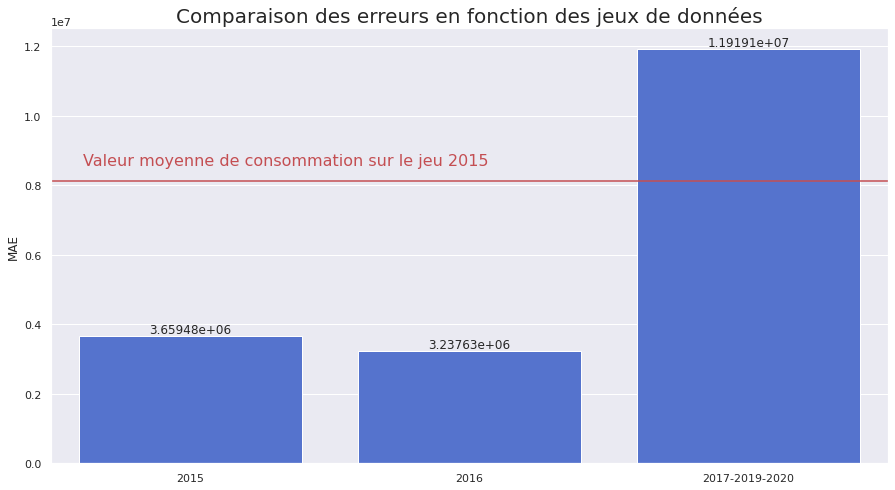

In [74]:
# Comparaison des erreurs de prédictions sur les jeux de données
sns.set()
plt.rcParams["figure.figsize"] = (15,8)
Jeux_de_données = ['2015','2016','2017-2019-2020']
Valeurs = [metrics.mean_absolute_error(target_conso_test, predictions_conso_select_RF_test),metrics.mean_absolute_error(data_encoded_2016['SiteEnergyUse'], predictions_conso_RF_select_2016_test),metrics.mean_absolute_error(target_conso_futur_test, predictions_conso_RF_select_futur_test)]

ax = sns.barplot(x=Jeux_de_données,y=Valeurs,color='royalblue')
plt.axhline(y=8124608,color='r')
_=ax.set_ylabel('MAE')

ax.annotate('Valeur moyenne de consommation sur le jeu 2015', xy=(1, 0), xycoords='axes fraction', fontsize=16,
                xytext=(-400, 295), textcoords='offset points',color='r',
                ha='right', va='bottom')

for container in ax.containers:
    ax.bar_label(container)

_ = ax.set_title('Comparaison des erreurs en fonction des jeux de données', fontsize=20)

### Ecarts de prédictions type de bâtiment sur 2016

In [75]:
BuidingType_2016 = pd.read_csv("BuidingType_2016.csv")
final_df_2016 = pd.concat([data_encoded_2016,pd.DataFrame(predictions_emmi_XGBoost_2016_test,columns=['Prédictions émissions']),
                           pd.DataFrame(predictions_conso_RF_select_2016_test,columns=['Prédictions consommations']),BuidingType_2016,],axis=1)
final_df_2016 = final_df_2016.groupby(by='BuildingType').mean()



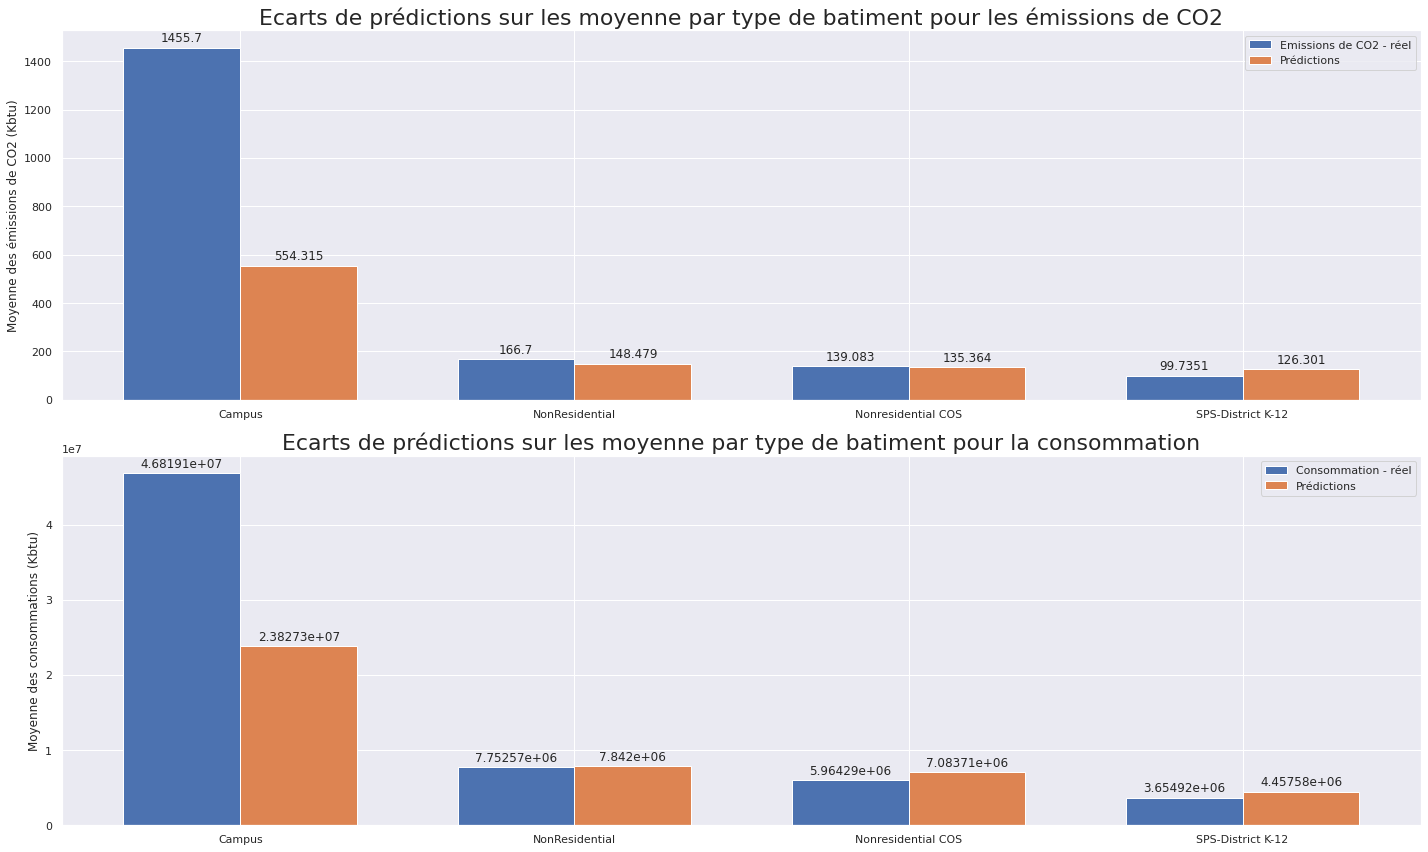

In [76]:
x = np.arange(len(final_df_2016.index))
width = 0.35

fig, ax = plt.subplots(2,figsize=(20,12), sharey=False, sharex=False)

scores1 = ax[0].bar(x - width/2, final_df_2016['TotalGHGEmissions'], width, label='Emissions de CO2 - réel')
scores2 = ax[0].bar(x + width/2, final_df_2016['Prédictions émissions'], width, label='Prédictions')

scores3 = ax[1].bar(x - width/2, final_df_2016['SiteEnergyUse'], width, label='Consommation - réel')
scores4 = ax[1].bar(x + width/2, final_df_2016['Prédictions consommations'], width, label='Prédictions')

ax[0].set_ylabel('Moyenne des émissions de CO2 (Kbtu)')
ax[1].set_ylabel('Moyenne des consommations (Kbtu)')

ax[0].set_title('Ecarts de prédictions sur les moyenne par type de batiment pour les émissions de CO2' ,fontsize=22)
ax[1].set_title('Ecarts de prédictions sur les moyenne par type de batiment pour la consommation' ,fontsize=22)

ax[0].bar_label(scores1, padding=3)
ax[0].bar_label(scores2, padding=3)

ax[1].bar_label(scores3, padding=3)
ax[1].bar_label(scores4, padding=3)
    
for i in range (2):
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(final_df_2016.index)
    ax[i].legend()


fig.tight_layout()

Text(0.5, 1.0, 'Prédictions années futures')

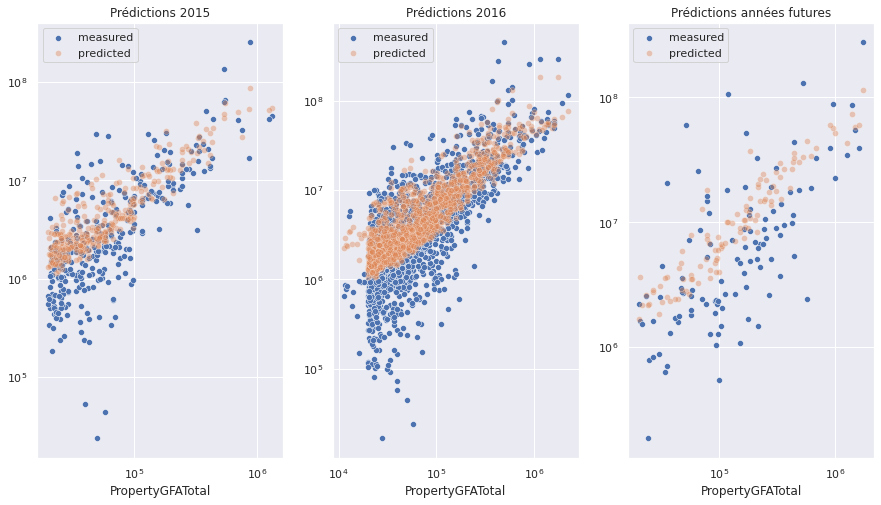

In [77]:
# Plot de toutes les prédictions
sns.set(font_scale = 1)
fig, axes = plt.subplots(1,3)
plt.rcParams["figure.figsize"] = (25,7)

# Sur le jeu de 2015
sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_conso_test.values.ravel(), label='measured' ,ax = axes[0])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=predictions_conso_select_RF_test.ravel(), label='predicted', alpha=0.4,ax = axes[0])

# Sur le jeu de 2016
sns.scatterplot(x=data_encoded_2016['PropertyGFATotal'], y=data_encoded_2016['SiteEnergyUse'].values.ravel(), label='measured' ,ax = axes[1])
sns.scatterplot(x=data_encoded_2016['PropertyGFATotal'], y=predictions_conso_RF_select_2016_test.ravel(), label='predicted', alpha=0.4,ax = axes[1])

# Sur les années futures
sns.scatterplot(x=data_encoded_futur['PropertyGFATotal'], y=data_encoded_futur['SiteEnergyUse'].values.ravel(), label='measured' ,ax = axes[2])
sns.scatterplot(x=data_encoded_futur['PropertyGFATotal'], y=predictions_conso_RF_select_futur_test.ravel(), label='predicted', alpha=0.4,ax = axes[2])

for i in range(3):
    axes[i].set_yscale('log')
    axes[i].set_xscale('log')
    
axes[0].set_title('Prédictions 2015')
axes[1].set_title('Prédictions 2016')
axes[2].set_title('Prédictions années futures')

## Fin